# Exploring the kingdoms of life

![](tree_life.pdf)

![](tree_life.png)

## Phenotypically, how diff are we from other species?

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('features.csv')

In [8]:
df.head()

,Features,Humans,Other_Animals
0,Tails,0,1
1,Gills,0,1
2,Fur,0,1
3,Bipedal_movement,1,0
4,Language,1,0


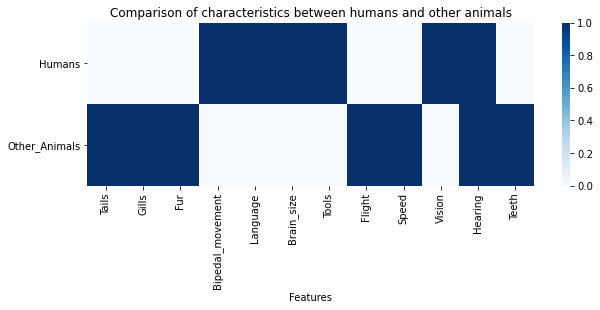

In [9]:
plt.figure(figsize=(10, 3))
sns.heatmap(df.set_index('Features').T, cmap='Blues')
plt.yticks(rotation=0)
plt.title('Comparison of characteristics between humans and other animals')
plt.show()

## How intelligent are humans against other species?

https://www.youtube.com/watch?v=2VUHdu_g8ok

In [10]:
df = pd.read_csv('iq.csv')

In [11]:
df.head()

,Species,IQ
0,Jelly_Fish,0.1
1,Bee,1.0
2,Spider,1.3
3,Snake,1.5
4,Ant,1.8


In [12]:
df.describe()

,IQ
count,46.000000
mean,14.943478
std,19.118957
min,0.100000
25%,5.225000
50%,7.850000
75%,17.750000
max,100.000000


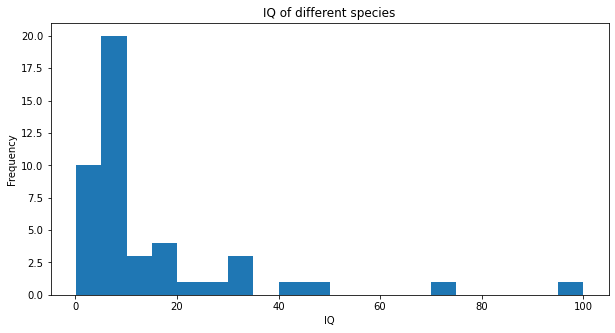

In [18]:
# Create a larger figure
plt.figure(figsize=(10, 5))

# Create a scatter plot
plt.hist(df['IQ'], bins=20)
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.title('IQ of different species')
plt.show()

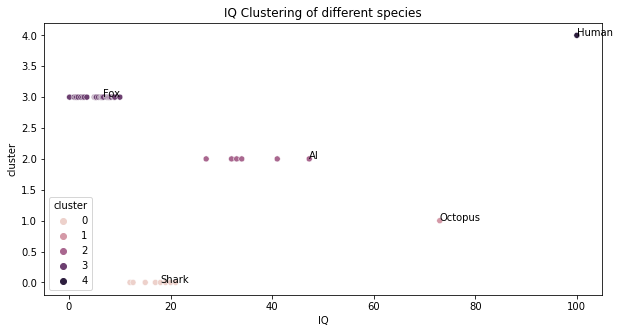

In [110]:
# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['IQ']])

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Create a larger figure
plt.figure(figsize=(10, 5))

# Plot the data using seaborn 
sns.scatterplot(x='IQ', y='cluster', hue='cluster', data=df)
for i, txt in enumerate(df['Species']):
    if df['IQ'][i] > 41 or txt == 'Fox' or txt == 'Shark':
        plt.annotate(txt, (df['IQ'][i], df['cluster'][i]))
plt.title('IQ Clustering of different species')
plt.show()